# Naive Bayes Model

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
file_path = os.path.join(os.getcwd(), "", "carclaims.csv")
df_bayes = pd.read_csv(file_path)

In [3]:
print(df_bayes.columns)

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'PolicyNumber', 'RepNumber', 'Deductible',
       'DriverRating', 'Days:Policy-Accident', 'Days:Policy-Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'FraudFound'],
      dtype='object')


In [4]:
# Display basic info
print("\n🔹 Dataset Info:")
print(df_bayes.info())

# Display first 5 rows
print("\n🔹 First 5 Rows:")
print(df_bayes.head())

# Check for missing values
print("\n🔹 Missing Values Count:")
print(df_bayes.isnull().sum())


🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  PolicyNumber       

In [5]:
#check duplications
df_bayes.duplicated().sum()

0

In [6]:
# Summary statistics
print("\n🔹 Summary Statistics:")
print(df_bayes.describe())


🔹 Summary Statistics:
        WeekOfMonth  WeekOfMonthClaimed           Age  PolicyNumber  \
count  15420.000000        15420.000000  15420.000000  15420.000000   
mean       2.788586            2.693969     39.855707   7710.500000   
std        1.287585            1.259115     13.492377   4451.514911   
min        1.000000            1.000000      0.000000      1.000000   
25%        2.000000            2.000000     31.000000   3855.750000   
50%        3.000000            3.000000     38.000000   7710.500000   
75%        4.000000            4.000000     48.000000  11565.250000   
max        5.000000            5.000000     80.000000  15420.000000   

          RepNumber    Deductible  DriverRating          Year  
count  15420.000000  15420.000000  15420.000000  15420.000000  
mean       8.483268    407.704280      2.487808   1994.866472  
std        4.599948     43.950998      1.119453      0.803313  
min        1.000000    300.000000      1.000000   1994.000000  
25%        5.0000

In [7]:
# Loop through each column and display the unique values
for column in df_bayes.columns:
    print(f"Unique values in {column}:")
    print(df_bayes[column].unique())
    print("\n" + "="*50 + "\n")

Unique values in Month:
['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep']


Unique values in WeekOfMonth:
[5 3 2 4 1]


Unique values in DayOfWeek:
['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']


Unique values in Make:
['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']


Unique values in AccidentArea:
['Urban' 'Rural']


Unique values in DayOfWeekClaimed:
['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0']


Unique values in MonthClaimed:
['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct'
 '0']


Unique values in WeekOfMonthClaimed:
[1 4 2 3 5]


Unique values in Sex:
['Female' 'Male']


Unique values in MaritalStatus:
['Single' 'Married' 'Widow' 'Divorced']


Unique values in Age:
[21 34 47 65 27 20 36  0 30 42 71 52 28 61 38 41 32 40 63 31 45 60 39 55
 35 44 72 29 37 59 49

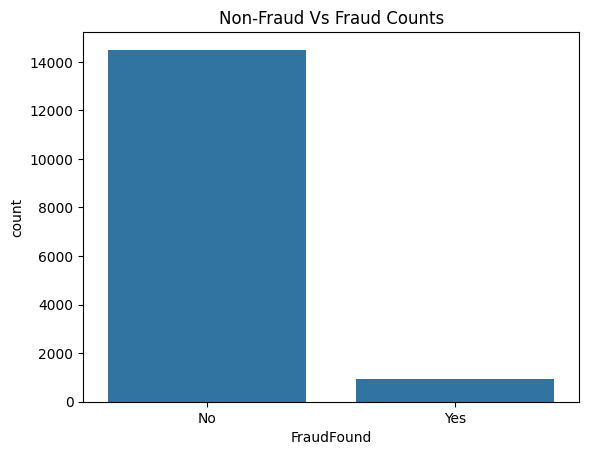

In [8]:
#check Volume of each classes
sns.countplot(x=df_bayes['FraudFound'])
plt.title("Non-Fraud Vs Fraud Counts")
plt.show()

In [9]:
# Check for missing values in the entire dataset
missing_values = df_bayes.isnull().sum()
print(missing_values)

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days:Policy-Accident    0
Days:Policy-Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange-Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
FraudFound              0
dtype: int64


1. PolicyNumber:
Nature: A unique identifier for each policy.

Recommendation:

Exclude it from the model because it's just a unique identifier. Naive Bayes models work with features that contain predictive information, and PolicyNumber is likely irrelevant to the target variable.

If you keep it by mistake, it might confuse the model, as it has no inherent relationship with the outcome you're trying to predict.

2. RepNumber:
Nature: A unique identifier for agents or representatives.

Recommendation:

Exclude it as well, because it represents a unique identifier for each representative and will likely not help predict the target variable (FraudFound).

Even though RepNumber could potentially encode some agent-related information (like performance), it is likely not relevant in the context of predicting fraud unless you have some features related to the agents’ behavior or performance.

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

In [11]:
ordinal_features = {
    'AgeOfVehicle': ['new', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', 'more than 7'],
    'AgeOfPolicyHolder': ['16 to 17', '18 to 20', '21 to 25', '26 to 30', '31 to 35', '36 to 40', '41 to 50', '51 to 65', 'over 65'],
    'Days:Policy-Accident': ['none', '1 to 7', '8 to 15', '15 to 30', 'more than 30'],
    'Days:Policy-Claim': ['none', '8 to 15', '15 to 30', 'more than 30'],
    'PastNumberOfClaims': ['none', '1', '2 to 4', 'more than 4'],
    'DriverRating': [1, 2, 3, 4],
    'NumberOfSuppliments': ['none', '1 to 2', '3 to 5', 'more than 5'],
    'VehiclePrice': ['less than 20,000', '20,000 to 29,000', '30,000 to 39,000', '40,000 to 59,000', '60,000 to 69,000', 'more than 69,000'],
    'WeekOfMonth': [1, 2, 3, 4, 5],
    'DayOfWeek': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    'DayOfWeekClaimed': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    'MonthClaimed': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    'WeekOfMonthClaimed': [1, 2, 3, 4, 5]
}

In [12]:
nominal_features = [
    'Month', 'Make', 'AccidentArea', 'Fault', 'PolicyType', 'VehicleCategory', 'Sex', 'MaritalStatus', 
    'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'AddressChange-Claim', 'NumberOfCars', 
    'BasePolicy', 'FraudFound'  # we will drop PolicyNumber and RepNumber later
]

In [13]:
# Apply ordinal encoding to ordinal features
ordinal_encoder = OrdinalEncoder()

# Apply the encoder to the ordinal columns
for feature, categories in ordinal_features.items():
    if feature in df_bayes.columns:
        ordinal_encoder.categories_ = [categories]  # Set categories for this feature
        df_bayes[feature] = ordinal_encoder.fit_transform(df_bayes[feature].values.reshape(-1, 1))


In [14]:
# Convert binary columns to 0 and 1
binary_columns = ['PoliceReportFiled', 'WitnessPresent', 'FraudFound']
for column in binary_columns:
    if column in df_bayes.columns:
        df_bayes[column] = df_bayes[column].map({'Yes': 1, 'No': 0})


In [15]:
# Apply OneHotEncoding to nominal features
df_bayes = pd.get_dummies(df_bayes, columns=nominal_features, drop_first=True)

In [16]:
# Drop non-predictive columns (PolicyNumber and RepNumber)
df_bayes = df_bayes.drop(columns=['PolicyNumber', 'RepNumber'])

In [17]:
df_bayes.head()

,WeekOfMonth,DayOfWeek,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Age,VehiclePrice,Deductible,DriverRating,Days:Policy-Accident,...,AddressChange-Claim_4 to 8 years,AddressChange-Claim_no change,AddressChange-Claim_under 6 months,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,BasePolicy_Collision,BasePolicy_Liability,FraudFound_1
0,4.0,6.0,6.0,5.0,0.0,21,5.0,300,0.0,3.0,...,False,False,False,False,True,False,False,False,True,False
1,2.0,6.0,2.0,5.0,3.0,34,5.0,400,3.0,3.0,...,False,True,False,False,False,False,False,True,False,False
2,4.0,0.0,5.0,10.0,1.0,47,5.0,400,2.0,3.0,...,False,True,False,False,False,False,False,True,False,False
3,1.0,2.0,1.0,6.0,0.0,65,0.0,400,1.0,3.0,...,False,True,False,False,False,False,False,False,True,False
4,4.0,1.0,6.0,4.0,1.0,27,5.0,400,0.0,3.0,...,False,True,False,False,False,False,False,True,False,False


In [18]:
# 8. Drop the target column 'FraudFound' from features and assign to y
X = df_bayes.drop(columns=['FraudFound_1'])  # Now, keep FraudFound out of features for prediction
y = df_bayes['FraudFound_1']  # Target variable is FraudFound

In [19]:
# Split into 93% for training+validation and 7% for testing
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.03, random_state=42)

#  Split the training+validation data into 90% for training and 7% for validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.07/0.97, random_state=42)


In [20]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [21]:
from imblearn.over_sampling import SMOTE

In [22]:
# Handle class imbalance using SMOTE (oversampling the minority class in the training set)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

In [23]:
print(f"Class distribution before SMOTE: {y_train.value_counts()}")
print(f"Class distribution after SMOTE: {y_train_res.value_counts()}")

Class distribution before SMOTE: FraudFound_1
False    13046
True       831
Name: count, dtype: int64
Class distribution after SMOTE: FraudFound_1
False    13046
True     13046
Name: count, dtype: int64


In [24]:
# Train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_res, y_train_res)

GaussianNB()

In [25]:
# Make predictions on the test set
y_test_prob_nb = nb_model.predict_proba(X_test_scaled)[:, 1]  # Probability of the positive class (fraud)

In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import roc_auc_score

In [27]:
threshold = 0.7  # Example threshold adjustment
y_test_pred_adjusted = (y_test_prob_nb > threshold).astype(int)

In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Assuming y_test is the true labels and y_test_pred_adjusted are the predicted labels after threshold adjustment

# Calculate Precision
precision = precision_score(y_test, y_test_pred_adjusted)
print(f"Precision: {precision:.4f}")

# Calculate Recall
recall = recall_score(y_test, y_test_pred_adjusted)
print(f"Recall: {recall:.4f}")

# Calculate F1-Score
f1 = f1_score(y_test, y_test_pred_adjusted)
print(f"F1-Score: {f1:.4f}")

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_test_pred_adjusted)
print(f"Accuracy: {accuracy:.4f}")

Precision: 0.0558
Recall: 1.0000
F1-Score: 0.1057
Accuracy: 0.0864


In [29]:
thresholds = np.arange(0.1, 1.0, 0.05)
for threshold in thresholds:
    y_test_pred_adjusted = (y_test_prob_nb > threshold).astype(int)
    precision = precision_score(y_test, y_test_pred_adjusted)
    recall = recall_score(y_test, y_test_pred_adjusted)
    f1 = f1_score(y_test, y_test_pred_adjusted)
    accuracy = accuracy_score(y_test, y_test_pred_adjusted)
    print(f"Threshold: {threshold:.2f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1-Score: {f1:.4f} | Accuracy: {accuracy:.4f}")


Threshold: 0.10 | Precision: 0.0558 | Recall: 1.0000 | F1-Score: 0.1057 | Accuracy: 0.0864
Threshold: 0.15 | Precision: 0.0558 | Recall: 1.0000 | F1-Score: 0.1057 | Accuracy: 0.0864
Threshold: 0.20 | Precision: 0.0558 | Recall: 1.0000 | F1-Score: 0.1057 | Accuracy: 0.0864
Threshold: 0.25 | Precision: 0.0558 | Recall: 1.0000 | F1-Score: 0.1057 | Accuracy: 0.0864
Threshold: 0.30 | Precision: 0.0558 | Recall: 1.0000 | F1-Score: 0.1057 | Accuracy: 0.0864
Threshold: 0.35 | Precision: 0.0558 | Recall: 1.0000 | F1-Score: 0.1057 | Accuracy: 0.0864
Threshold: 0.40 | Precision: 0.0558 | Recall: 1.0000 | F1-Score: 0.1057 | Accuracy: 0.0864
Threshold: 0.45 | Precision: 0.0558 | Recall: 1.0000 | F1-Score: 0.1057 | Accuracy: 0.0864
Threshold: 0.50 | Precision: 0.0558 | Recall: 1.0000 | F1-Score: 0.1057 | Accuracy: 0.0864
Threshold: 0.55 | Precision: 0.0558 | Recall: 1.0000 | F1-Score: 0.1057 | Accuracy: 0.0864
Threshold: 0.60 | Precision: 0.0558 | Recall: 1.0000 | F1-Score: 0.1057 | Accuracy: 0.0864

In [30]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_adjusted))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_adjusted))

accuracy = accuracy_score(y_test, y_test_pred_adjusted)
print(f"\nAccuracy: {accuracy:.4f}")

Confusion Matrix:
[[ 15 423]
 [  0  25]]

Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.03      0.07       438
        True       0.06      1.00      0.11        25

    accuracy                           0.09       463
   macro avg       0.53      0.52      0.09       463
weighted avg       0.95      0.09      0.07       463


Accuracy: 0.0864


AUC: 0.5274


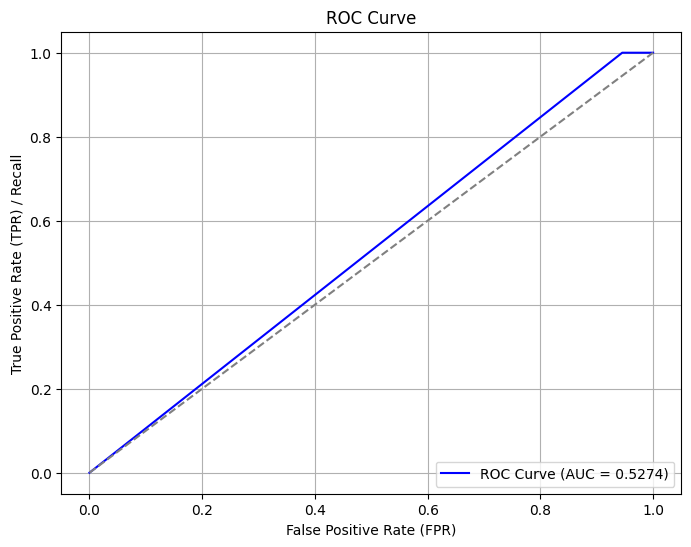

In [31]:
# Predict Probabilities for Test Data (For ROC Curve and AUC calculation)
y_test_prob_nb = nb_model.predict_proba(X_test_scaled)[:, 1]  # Probability of the positive class (fraud)

# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob_nb)

# Calculate AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_test_prob_nb)
print(f"AUC: {auc:.4f}")

# Step 4: Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line representing random classifier
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) / Recall')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

The fact that the precision, recall, F1-score, and accuracy remain unchanged across all thresholds indicates that the model is overwhelmingly predicting the positive class (fraud), which results in a high recall (1.0) but very low precision (0.0558). This suggests that the model is identifying all instances as fraud, regardless of the threshold.

Key Insights:
Recall = 1.0: The model is correctly identifying all actual fraud cases. This is great, but at the cost of precision. The model is very sensitive (high recall) but not specific (low precision).

Precision = 0.0558: Out of all the instances the model predicted as fraud, only about 5.58% were actually fraud, which is quite poor.

F1-Score = 0.1057: The F1-score is low because it is a harmonic mean of precision and recall, and precision is quite low. A high recall combined with a low precision results in a low F1-score.

Accuracy = 0.0864: Accuracy is low because while the model is correctly identifying fraud cases, it is overwhelmingly classifying most instances as fraud (since the dataset is imbalanced), leading to many false positives.

What Can Be Done?
Class Imbalance: The model is heavily influenced by the class imbalance, where fraud cases are much fewer than non-fraud cases. You can try:

Using other algorithms (e.g., Logistic Regression with class weights, Random Forest, or XGBoost) that can handle imbalanced classes better.

Resampling techniques such as SMOTE (already used) or undersampling the majority class might be further refined.

Threshold Adjustment:

Even with the threshold set at 0.7, your model might still be predicting fraud too often. You might try applying a more drastic threshold increase (e.g., 0.9 or 0.95) to reduce the number of predicted fraud instances, but it looks like the model is not providing meaningful probabilities to shift this behavior.

Model Choice:

Naive Bayes might not be the best for imbalanced datasets as it is prone to over-predicting the minority class when it is underrepresented. Instead, try models like Logistic Regression with class weights or Random Forest which can handle class imbalance better.

Model Evaluation: Focus on Precision-Recall curves and the Area Under the Precision-Recall Curve (PR AUC) rather than just using accuracy. Accuracy isn't a good metric in imbalanced datasets.

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

# Perform cross-validation to evaluate Naive Bayes
model = GaussianNB()
cv_scores = cross_val_score(model, X_train_res, y_train_res, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f}")

Cross-Validation Accuracy: 0.5219


The Cross-Validation Accuracy of 0.5219 indicates that when the model is evaluated on multiple different splits of the data, it performs at about 52.19% accuracy on average. This result is a bit better than what we observed earlier, where the model’s accuracy on the test set was quite low (around 8.64%). This difference suggests that the model might be overfitting to the test data or performing poorly due to class imbalance.

In [34]:
from sklearn.metrics import roc_auc_score, average_precision_score

# Evaluate Naive Bayes using ROC AUC and PR AUC
roc_auc_nb = roc_auc_score(y_test, y_test_prob_nb)
pr_auc_nb = average_precision_score(y_test, y_test_prob_nb)
print(f"Naive Bayes ROC AUC: {roc_auc_nb}")
print(f"Naive Bayes PR AUC: {pr_auc_nb}")



Naive Bayes ROC AUC: 0.5273972602739726
Naive Bayes PR AUC: 0.05694760820045558


In [37]:
from sklearn.ensemble import IsolationForest
# Step 4: Train the Isolation Forest model
# Step 4: Train the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)

# Fit the model on the training data (resampled)
iso_forest.fit(X_train_scaled)

# Make predictions on the test data (anomaly detection)
y_pred_iso = iso_forest.predict(X_test_scaled)

# Convert Isolation Forest predictions to binary format (1 for outliers, 0 for inliers)
y_pred_iso = [1 if x == -1 else 0 for x in y_pred_iso]

# Evaluate Isolation Forest using ROC AUC and PR AUC
roc_auc_iso = roc_auc_score(y_test, y_pred_iso)
pr_auc_iso = average_precision_score(y_test, y_pred_iso)

print(f"Isolation Forest ROC AUC: {roc_auc_iso}")
print(f"Isolation Forest PR AUC: {pr_auc_iso}")


Isolation Forest ROC AUC: 0.500593607305936
Isolation Forest PR AUC: 0.05405807535397168


In [40]:
from keras.models import Model
from keras.layers import Input, Dense
# Step 5: Train the Autoencoder model
input_dim = X_train_scaled.shape[1]  # Number of features
encoding_dim = 14  # Set encoding dimensions (you can adjust this)

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(X_train_scaled, X_train_scaled, epochs=50, batch_size=256, shuffle=True, validation_split=0.2)

# Get the reconstruction error
reconstructed = autoencoder.predict(X_test_scaled)
mse = ((X_test_scaled - reconstructed) ** 2).mean(axis=1)

# Define a threshold for anomaly detection based on reconstruction error
threshold = mse.mean() + mse.std()

# Predict anomalies using Autoencoder
y_pred_autoencoder = [1 if error > threshold else 0 for error in mse]

# Evaluate Autoencoder using ROC AUC and PR AUC
roc_auc_auto = roc_auc_score(y_test, y_pred_autoencoder)
pr_auc_auto = average_precision_score(y_test, y_pred_autoencoder)

print(f"Autoencoder ROC AUC: {roc_auc_auto}")
print(f"Autoencoder PR AUC: {pr_auc_auto}")

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.1822 - val_loss: 1.2263
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1377 - val_loss: 1.1397
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0706 - val_loss: 1.0709
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0117 - val_loss: 1.0272
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9561 - val_loss: 0.9985
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9364 - val_loss: 0.9774
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8984 - val_loss: 0.9605
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8840 - val_loss: 0.9463
Epoch 9/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8594 - val_loss: 0.9339
Epoch 10/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8651 - val_loss: 0.9234
Epoch 11/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8450 - val_loss: 0.9144
Epoch 12/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8583 - val_lo